In [10]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.constants import physical_constants as csts
from mpl_toolkits.mplot3d import Axes3D

%matplotlib inline

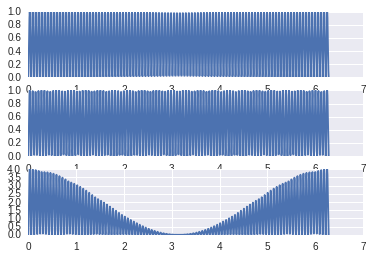

In [11]:
a_0 = csts['Bohr radius']

def rydberg_radius(n):
    return a_0*n**2

def rydberg_circumference(n):
    return 2*np.pi*rydberg_radius(n)

x = np.linspace(0, 2*np.pi, 1000)

fig = plt.figure()
axe1 = fig.add_subplot(311)
axe1.plot(x, np.sin(x*50)**2)

axe2 = fig.add_subplot(312)
axe2.plot(x, np.sin(x*51)**2)

axe3 = fig.add_subplot(313)
axe3.plot(x, (np.sin(x*50)+np.sin(x*51))**2)

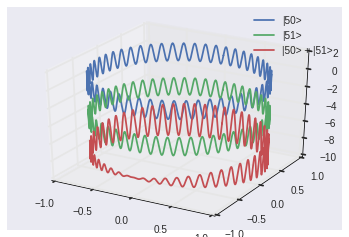

In [12]:
xs = np.sin(x)
ys = np.cos(x)
zs_1 = np.sin(x*50)
zs_2 = np.sin(x*51) - 4
zs_3 = zs_1+zs_2 - 4

labels = ['|50>', '|51>', '|50> + |51>']

fig = plt.figure()
axe3d = fig.gca(projection='3d')

for i, zs in enumerate([zs_1, zs_2, zs_3]):
    axe3d.plot(xs, ys, zs, label=labels[i])

axe3d.legend() 

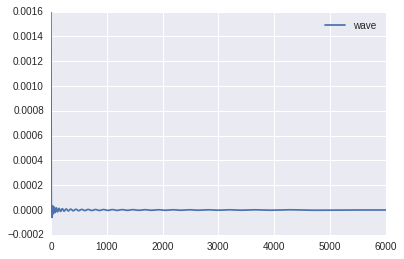

In [136]:
from scipy.special import eval_genlaguerre

x = np.linspace(0, 6000, 1000)

def s_wave(r, n):
    pre = 0.5*np.sqrt(2**3/(2*np.pi*n**5))
    L_n = eval_genlaguerre(n-1, 1, 2*r/n)
    return pre*np.exp(-r/n)*L_n

plt.plot(x, s_wave(x, 50), label='wave')
#plt.plot(x, eval_genlaguerre(50,1,x), label='lag')
#plt.plot(x, np.exp(-x/50), label='exp')



plt.legend()

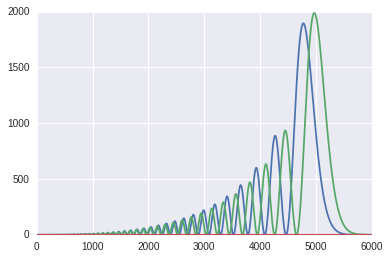

In [142]:
from scipy.integrate import quad

def s_wave_r(r, n): # integration over volume between r_low and r_high
    f = lambda y: (y**2 * s_wave(y,n))
    psi_r = f(r)
    return psi_r


plt.plot(x, s_wave_r(x, 50)**2)
plt.plot(x, s_wave_r(x, 51)**2)
plt.plot(x, s_wave_r(x, 1)**2)
#plt.plot(x, (s_wave_50+s_wave_51)**2)